## 设置Matplotlib中文字体

In [1]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [3]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


--2025-04-28 17:45:52--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  15.6MB/s    用时 0.6s    

2025-04-28 17:45:53 (15.6 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



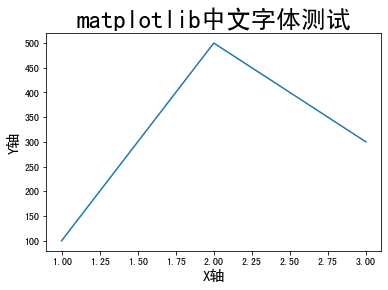

In [4]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 进入MMSegmentation主目录

In [5]:
import os
# os.chdir('mmsegmentation')

In [6]:
os.getcwd()

'/home/featurize/work/MMSegmentation_Tutorials-main/20230215/【D1】Kaggle代码实战-肾小球切片语义分割'

## 导入工具包

In [7]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 载入训练日志

In [24]:
# 日志文件路径
log_path = './work_dirs/tutorial/20250428_161501/vis_data/scalars.json'

In [25]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [26]:
len(json_list)

540

In [27]:
eval(json_list[4])

{'lr': 0.00994451655954398,
 'data_time': 0.01203150749206543,
 'loss': 0.05106611140072346,
 'decode.loss_ce': 0.03630140135064721,
 'decode.acc_seg': 99.19650268554688,
 'aux.loss_ce': 0.014764710771851241,
 'aux.acc_seg': 99.19650268554688,
 'time': 0.21429924964904784,
 'iter': 250,
 'memory': 3908,
 'step': 250}

In [28]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'aAcc' in each:
        df_test = df_test.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

In [29]:
df_train

,lr,data_time,loss,decode.loss_ce,decode.acc_seg,aux.loss_ce,aux.acc_seg,time,iter,memory,step
0,0.009989,0.008144,0.097338,0.069591,99.761345,0.027747,99.761345,0.210743,50.0,6418.0,50.0
1,0.009978,0.009461,0.068482,0.044678,97.899284,0.023804,97.899284,0.212770,100.0,3908.0,100.0
2,0.009967,0.010775,0.094682,0.067226,97.728539,0.027456,97.728539,0.215713,150.0,3908.0,150.0
3,0.009956,0.009936,0.063494,0.044120,98.692726,0.019374,98.692726,0.213062,200.0,3908.0,200.0
4,0.009945,0.012032,0.051066,0.036301,99.196503,0.014765,99.196503,0.214299,250.0,3908.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...
475,0.004489,0.011620,0.011258,0.007648,99.882195,0.003611,99.883446,0.214996,23800.0,3908.0,23800.0
476,0.004477,0.011713,0.009865,0.006733,99.771149,0.003131,99.791573,0.214591,23850.0,3908.0,23850.0
477,0.004464,0.008973,0.012884,0.008011,100.000000,0.004872,100.000000,0.212192,23900.0,3908.0,23900.0
478,0.004452,0.010831,0.004012,0.002550,100.000000,0.001462,100.000000,0.215866,23950.0,3908.0,23950.0


In [30]:
df_test

,aAcc,mIoU,mAcc,mDice,mFscore,mPrecision,mRecall,data_time,time,step
0,98.41,70.03,89.27,79.01,79.01,73.14,89.27,0.003410,0.056936,400.0
1,99.49,82.79,85.11,89.67,89.67,95.63,85.11,0.002499,0.050717,800.0
2,99.46,83.67,89.62,90.30,90.30,91.00,89.62,0.002840,0.050654,1200.0
3,98.60,72.34,91.54,81.19,81.19,75.10,91.54,0.003463,0.057898,1600.0
4,99.58,86.72,91.42,92.38,92.38,93.38,91.42,0.003321,0.059981,2000.0
5,99.59,87.06,91.55,92.60,92.60,93.71,91.55,0.002809,0.054031,2400.0
6,99.55,84.79,86.70,91.08,91.08,96.69,86.70,0.002604,0.051285,2800.0
7,99.61,87.26,90.36,92.73,92.73,95.40,90.36,0.003094,0.053902,3200.0
8,99.50,82.69,83.91,89.59,89.59,97.66,83.91,0.002629,0.052433,3600.0
9,99.62,87.32,89.88,92.77,92.77,96.12,89.88,0.002862,0.052706,4000.0


## 导出训练日志表格

In [31]:
df_train.to_csv('./mmsegmentation/图表/训练日志-训练集3.csv', index=False)
df_test.to_csv('./mmsegmentation/图表/训练日志-测试集3.csv', index=False)

## 可视化辅助函数

In [32]:
from matplotlib import colors as mcolors
import random
random.seed(253)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [33]:
metrics = ['loss', 'decode.loss_ce', 'aux.loss_ce']

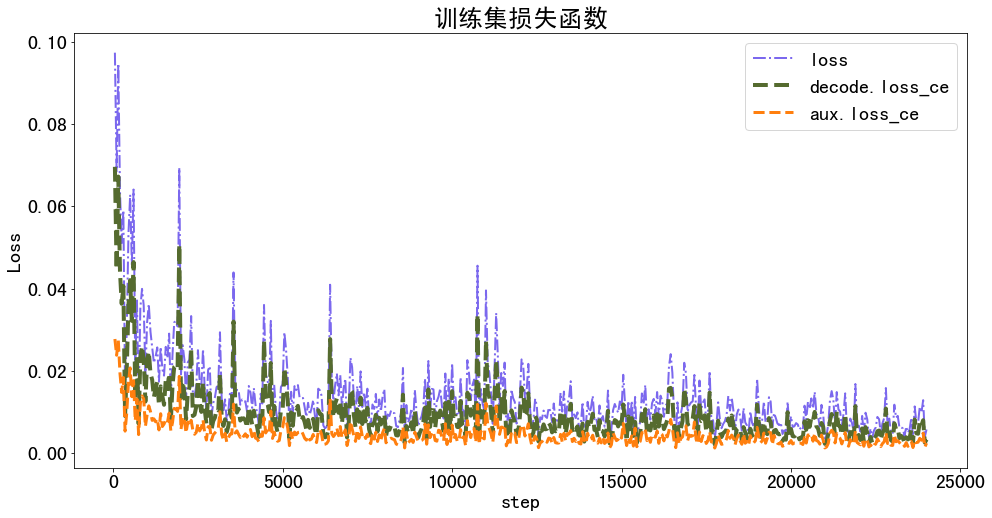

In [34]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('./mmsegmentation/图表/训练集损失函数3.pdf', dpi=240, bbox_inches='tight')

plt.show()

## 训练集准确率

In [35]:
metrics = ['decode.acc_seg', 'aux.acc_seg']

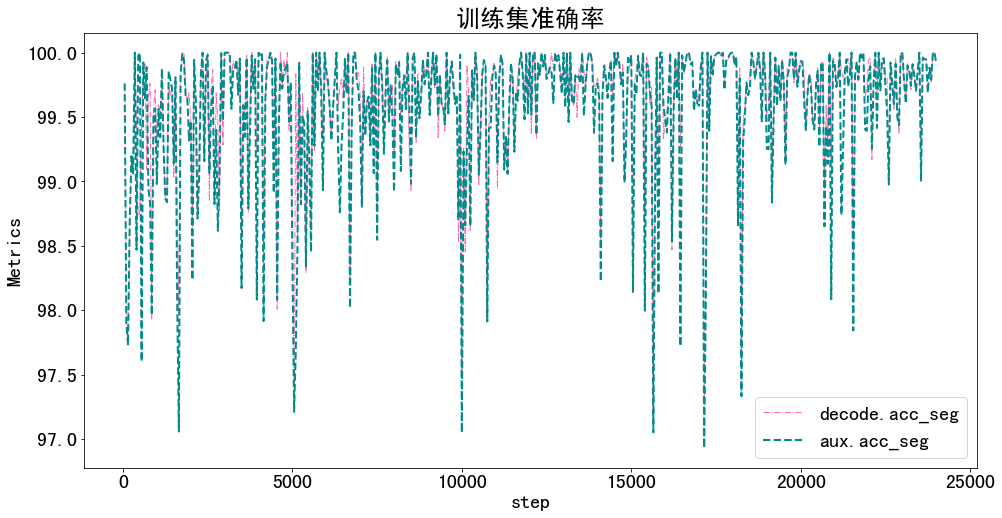

In [36]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('训练集准确率', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('./mmsegmentation/图表/训练集准确率3.pdf', dpi=240, bbox_inches='tight')

plt.show()

## 测试集评估指标

In [37]:
df_test.columns

Index(['aAcc', 'mIoU', 'mAcc', 'mDice', 'mFscore', 'mPrecision', 'mRecall',
       'data_time', 'time', 'step'],
      dtype='object')

In [38]:
metrics = ['aAcc', 'mIoU', 'mRecall', 'mPrecision', 'mFscore', 'mDice']#, 'mAcc']

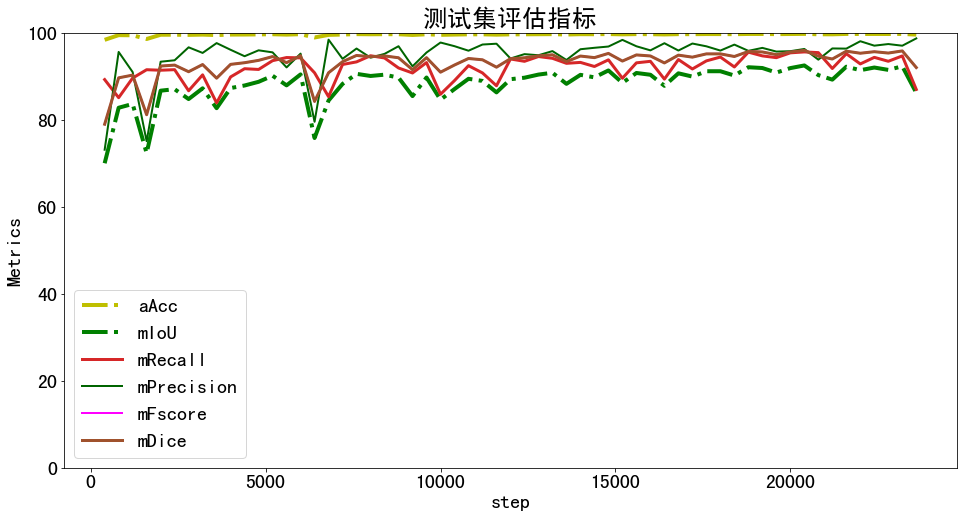

In [39]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    try:
        plt.plot(x, df_test[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('测试集评估指标', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('./mmsegmentation/图表/测试集分类评估指标3.pdf', dpi=240, bbox_inches='tight')

plt.show()